<a href="https://colab.research.google.com/github/OmBirari/Zomato-EDA/blob/main/Zomato_Dataset_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('zomato.csv', encoding='latin-1')
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

<h2>In Data Analysis we need to do:</h2>
1) Missing Values <br>
2)Explore about the Numerical Variables<br>
3)Explore about categorical variables<br>
4)Finding relationship bewteen features

In [8]:
df.isnull().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [10]:
[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

<Axes: >

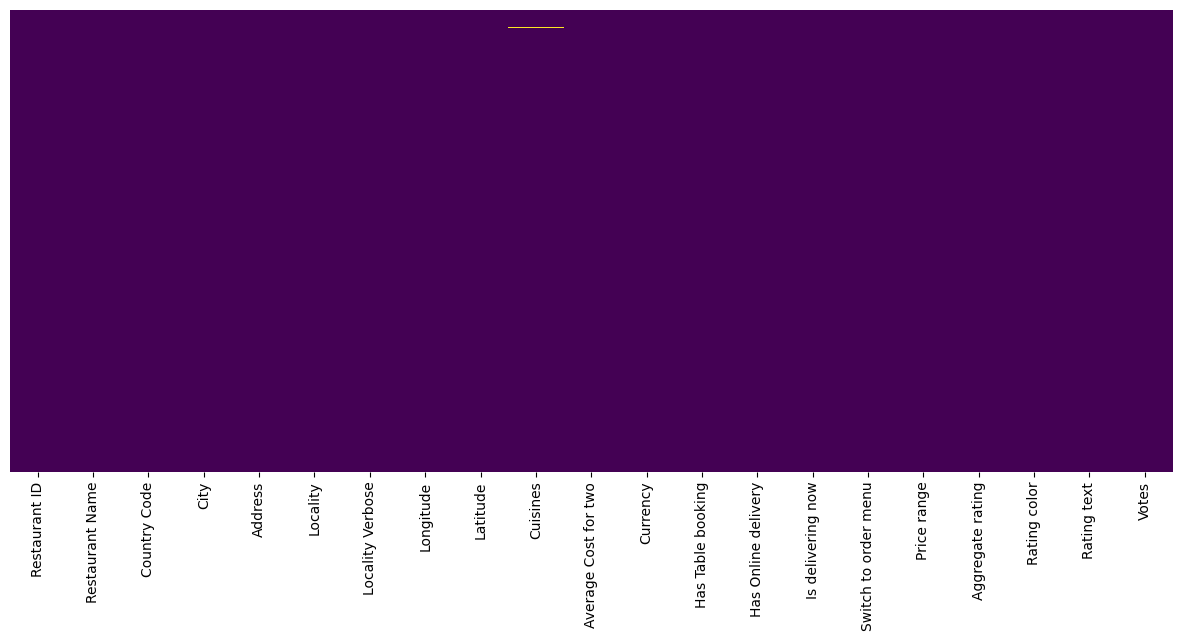

In [77]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = [15,6]
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
df_country=pd.read_excel('Country-Code.xlsx')

In [22]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [27]:
final_df= pd.merge(df,df_country,on='Country Code',how='left')

In [29]:
final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


In [30]:
country_names= final_df.Country.value_counts().index


In [33]:
country_val=final_df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x7b45a64b7190>,
 [Text(-1.0829742700952103, 0.19278674827836725, 'India'),
  Text(1.077281715838356, -0.22240527134123297, 'United States'),
  Text(1.0995865153823035, -0.03015783794312073, 'United Kingdom')],
 [Text(-0.590713238233751, 0.10515640815183668, '94.39%'),
  Text(0.5876082086391032, -0.12131196618612707, '4.73%'),
  Text(0.5997744629358018, -0.01644972978715676, '0.87%')])

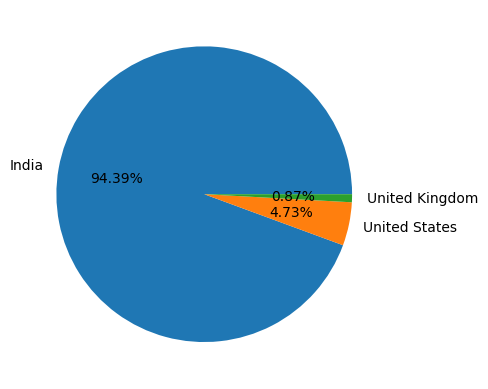

In [45]:
##Pie Chart- Top 3 countries
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

Observation: India means Business

In [62]:
ratings= final_df.groupby(['Aggregate rating', 'Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

In [63]:
ratings.head(10)

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


Observation: <br>
1) When rating 4.5 - 4.9 = Excellent <br>
2) When rating 4.0 - 3.4 = Very Good <br>
3) When rating 3.5 - 3.9 = Good      <br>
4) When rating 2.5 - 3.4 = Average   <br>
5) When rating 1.8 - 2.4 = Poor

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

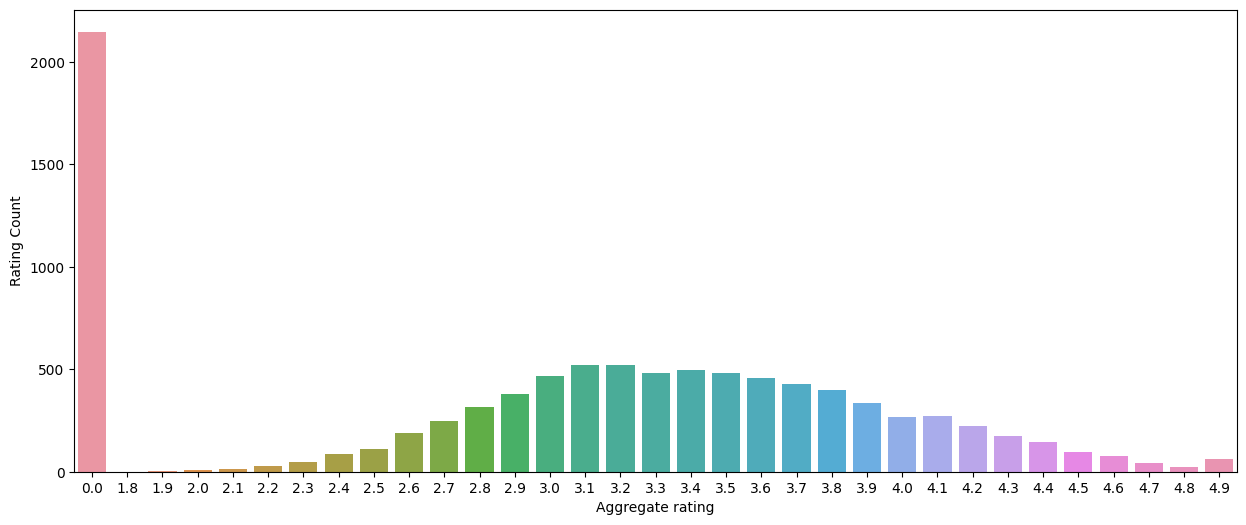

In [79]:
matplotlib.rcParams['figure.figsize'] = [15,6]
sns.barplot(x="Aggregate rating", y="Rating Count",data=ratings)

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

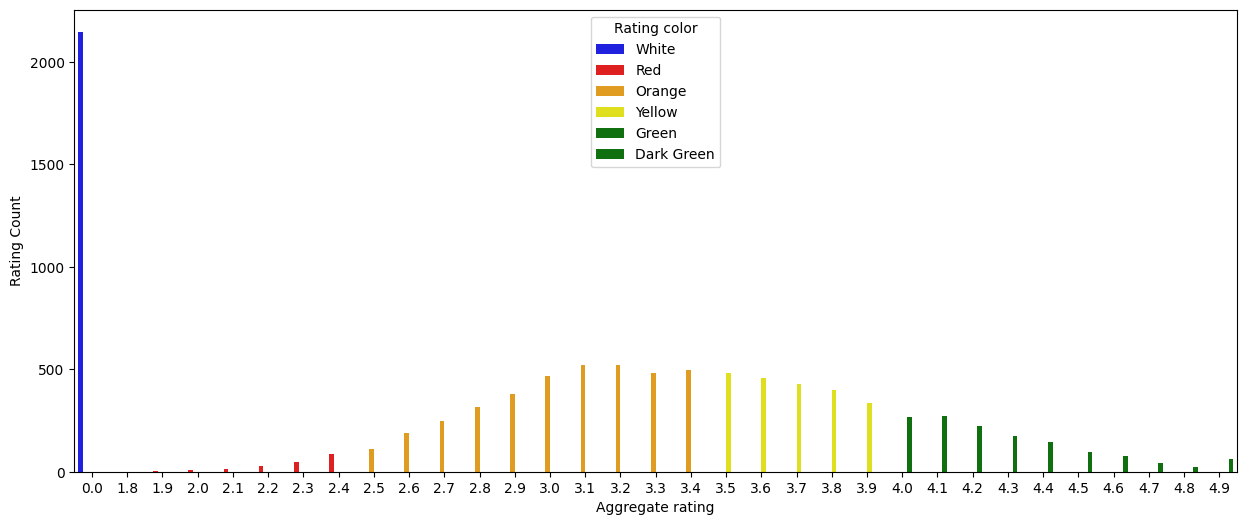

In [91]:
sns.barplot(x="Aggregate rating", y="Rating Count", hue='Rating color', data=ratings, palette=['blue','red','orange','yellow','green','green'])

Observation:<br>
1) Not rated count is very high  <br>
2) Maximum number of ratings is betweeen 2.5 to 3.4



<Axes: xlabel='Rating color', ylabel='count'>

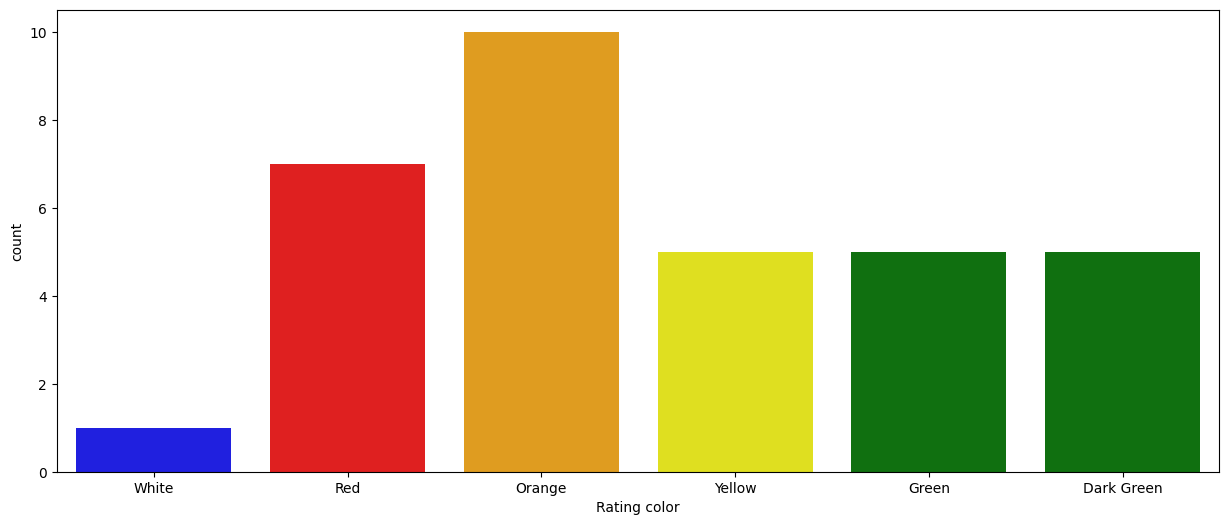

In [92]:
##count plot
sns.countplot(x="Rating color", data=ratings, palette=['blue','red','orange','yellow','green','green'])

In [97]:
## Find the countries that gave 0 ratings
final_df.groupby(['Aggregate rating', 'Country']).size().reset_index().head(5)

,Aggregate rating,Country,0
0,0.0,Brazil,5
1,0.0,India,2139
2,0.0,United Kingdom,1
3,0.0,United States,3
4,1.8,India,1


Observation: <br>
Maximum number of 0 ratings are from Indian customers

In [98]:
## Find out which currecy is used by which counrty
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [102]:
final_df.groupby(['Currency', 'Country']).size().reset_index().head(10)

,Currency,Country,0
0,Botswana Pula(P),Phillipines,22
1,Brazilian Real(R$),Brazil,60
2,Dollar($),Australia,24
3,Dollar($),Canada,4
4,Dollar($),Singapore,20
5,Dollar($),United States,434
6,Emirati Diram(AED),UAE,60
7,Indian Rupees(Rs.),India,8652
8,Indonesian Rupiah(IDR),Indonesia,21
9,NewZealand($),New Zealand,40


In [110]:
## which countries have online delivery
final_df[final_df['Has Online delivery']=="Yes"].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

Observations: <br>
Online deliveries are available in India and UAE

In [113]:
##Create a pie chart for top 5 cities distribution
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Amritsar', 'Ahmedabad', 'Lucknow', 'Guwahati',
       ...
       'Ojo Caliente', 'Montville', 'Monroe', 'Miller', 'Middleton Beach',
       'Panchkula', 'Mc Millan', 'Mayfield', 'Macedon', 'Vineland Station'],
      dtype='object', length=141)

In [127]:
city_values=final_df.City.value_counts().values


In [128]:
city_labels=final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7b4564e2c2e0>,
 [Text(-0.6145352824185932, 0.9123301960708633, 'New Delhi'),
  Text(0.0623675251198054, -1.0982305276263407, 'Gurgaon'),
  Text(0.8789045225625368, -0.6614581167535246, 'Noida'),
  Text(1.0922218418223437, -0.13058119407559224, 'Faridabad'),
  Text(1.099946280005612, -0.010871113182029924, 'Ghaziabad')],
 [Text(-0.3352010631374145, 0.497634652402289, '68.87%'),
  Text(0.0340186500653484, -0.5990348332507311, '14.07%'),
  Text(0.47940246685229276, -0.36079533641101336, '13.59%'),
  Text(0.5957573682667329, -0.07122610585941394, '3.16%'),
  Text(0.5999706981848791, -0.005929698099289049, '0.31%')])

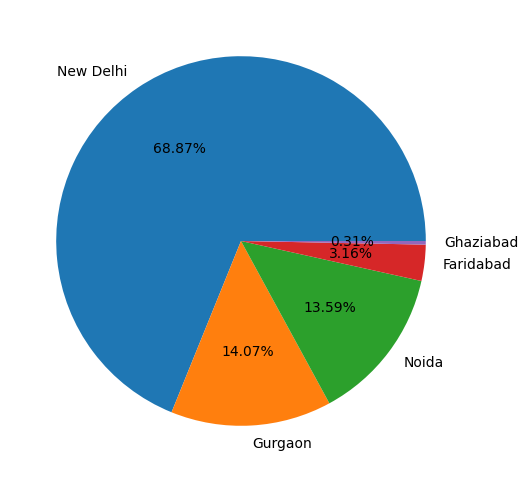

In [134]:
plt.pie(city_values[:5],labels=city_labels[:5],autopct='%1.2f%%')

In [ ]:
## Find the top 10 cuisines

In [142]:
final_df.Cuisines.value_counts()[:5]


North Indian             936
North Indian, Chinese    511
Chinese                  354
Fast Food                354
North Indian, Mughlai    334
Name: Cuisines, dtype: int64